<a href="https://colab.research.google.com/github/Bindhya-K/DigitClassification/blob/master/DigitClassification_KerasSequential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras import models

In [4]:
from keras.layers import Dense,Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
import numpy as np
import livelossplot

In [ ]:
pip install livelossplot

In [22]:
import livelossplot
from livelossplot import PlotLossesKeras
plot_losses = PlotLossesKeras()

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def data_summary(X_train,y_train,X_test,y_test):
  print("X_train.shape",X_train.shape)
  print("y_train.shape",y_train.shape)
  print("X_test.shape",X_test.shape)
  print("y_test.shape",y_test.shape)
  print("Train Labels",y_train)
  print("Test Labels",y_test)


In [8]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()
data_summary(X_train,y_train,X_test,y_test)

11490434/11490434 [==============================] - 0s 0us/step
X_train.shape (60000, 28, 28)
y_train.shape (60000,)
X_test.shape (10000, 28, 28)
y_test.shape (10000,)
Train Labels [5 0 4 ... 5 6 8]
Test Labels [7 2 1 ... 4 5 6]


In [9]:
X_train[0].shape# each image is of 28 x 28

(28, 28)

In [10]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [11]:
y_train[0] # the above array corresponds to number 5

5

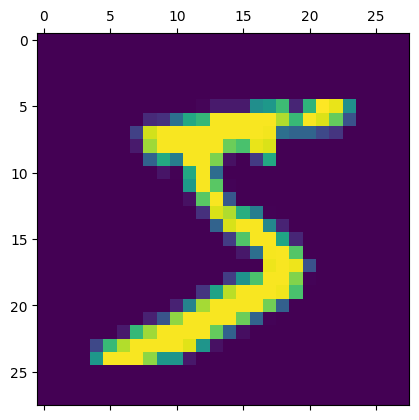

In [12]:
plt.matshow(X_train[0])

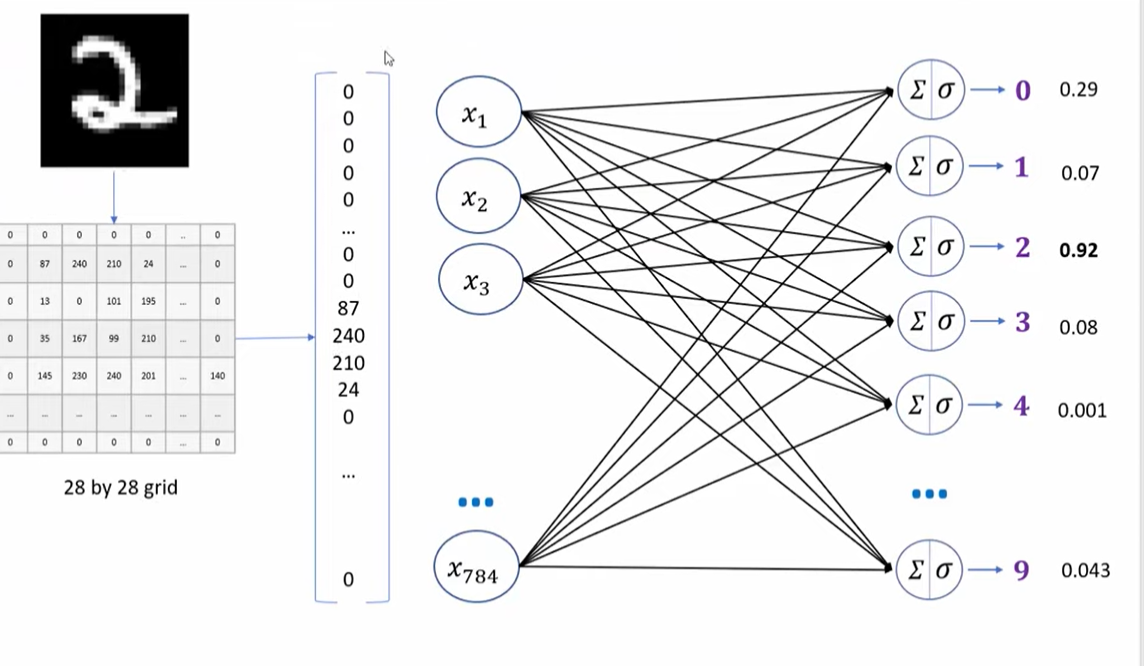

the input image (28 x 28) is flattened into 28*28=784 and given as input with 784 neurons. the output has 10 neurons to identify 10(0-9) numbers

In [13]:
X_train.dtype

dtype('uint8')

In [14]:
X_train.shape[2]

28

In [15]:
num_rows,num_cols = X_train.shape[1],X_train.shape[2]

In [16]:
# Reshape the data and converting between 0 and 1
X_train = X_train.reshape(X_train.shape[0],num_rows*num_cols)
X_train = X_train.astype('float32')/255
X_test = X_test.reshape(X_test.shape[0],num_rows*num_cols)
X_test = X_test.astype('float32')/255
data_summary(X_train,y_train,X_test,y_test)

X_train.shape (60000, 784)
y_train.shape (60000,)
X_test.shape (10000, 784)
y_test.shape (10000,)
Train Labels [5 0 4 ... 5 6 8]
Test Labels [7 2 1 ... 4 5 6]


In [17]:
y_train = to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test,num_classes =10)

In [18]:
print(y_train[0]) # 1 corresponds to number 5 and rest are 0's

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [19]:
# building the sequential model
model = models.Sequential()
model.add(Dense(512,activation='relu',input_shape=(num_rows * num_cols,)))
model.add(Dropout(0.5))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))


In [21]:
# Compile the model
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',  # since the output label has changed to categorical, no sparse is needed
    metrics =['accuracy']
)

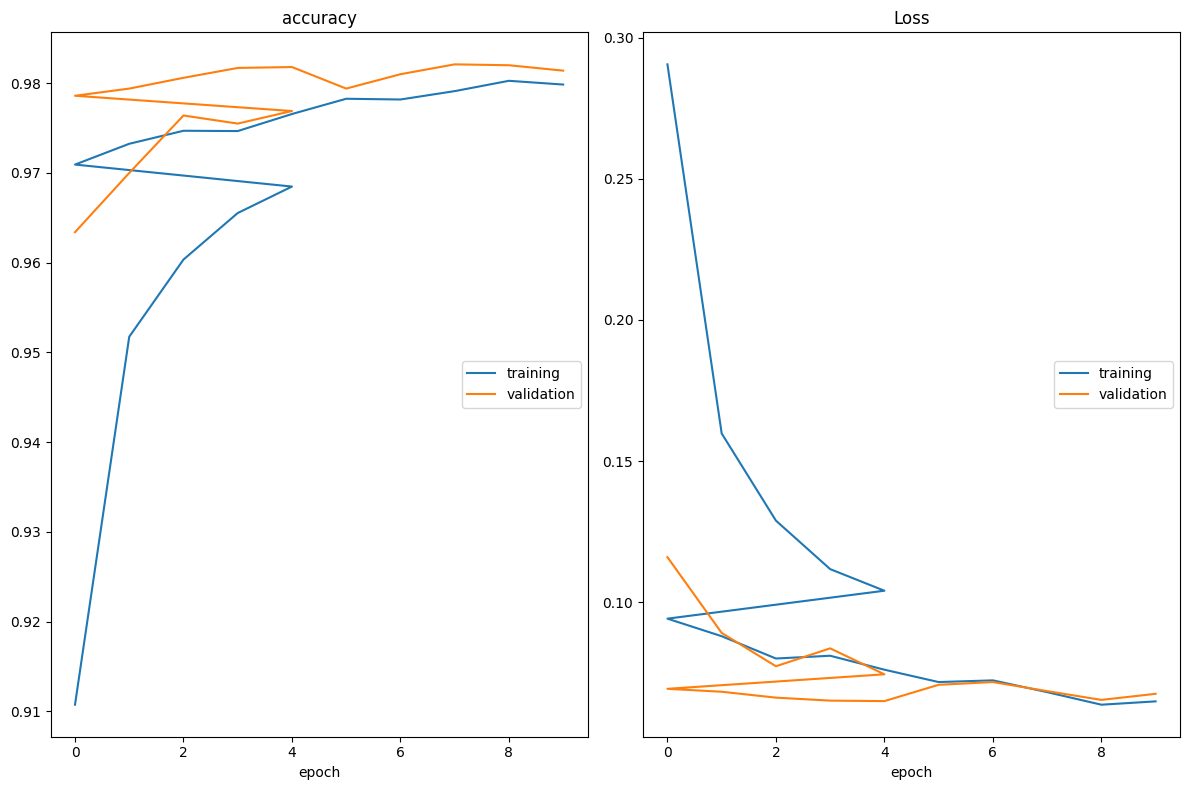

accuracy
	training         	 (min:    0.911, max:    0.980, cur:    0.980)
	validation       	 (min:    0.963, max:    0.982, cur:    0.981)
Loss
	training         	 (min:    0.064, max:    0.291, cur:    0.065)
	validation       	 (min:    0.065, max:    0.116, cur:    0.068)
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0650 - accuracy: 0.9798 - val_loss: 0.0676 - val_accuracy: 0.9814


In [26]:
# Train the model
model.fit(X_train, y_train,epochs=10,callbacks=[plot_losses],validation_data=(X_test,y_test))

In [24]:
score = model.evaluate(X_test,y_test)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0746 - accuracy: 0.9769
Test loss: 0.07455185800790787
Test accuracy: 0.9768999814987183
